In [1]:
import timeit 

In [2]:
def test_add():
    a = 10
    b = 20
    s = a + b
    return s

In [3]:
print(timeit.timeit(test_add, number=10_000_000))

0.8265204000053927


In [4]:
print(timeit.timeit(test_add, number=10_000))

0.0008581000147387385


### Q]Why is there a discripency?
- its just change in number of iterations
- demonstrated performance of CPU and no relation with input  

In [1]:
def test_add():
    a = 10
    b = 20
    return a + b


In [2]:
import time
import matplotlib.pyplot as plt

def time_test(func, number):
    start = time.perf_counter()
    for _ in range(number):
        func()
    end = time.perf_counter()
    return (end - start)


In [3]:
repeat_counts = [10**i for i in range(2, 8)]  # [100, 1000, 10000, ..., 1_000_000]
times = []

for count in repeat_counts:
    t = time_test(test_add, count)
    times.append(t)


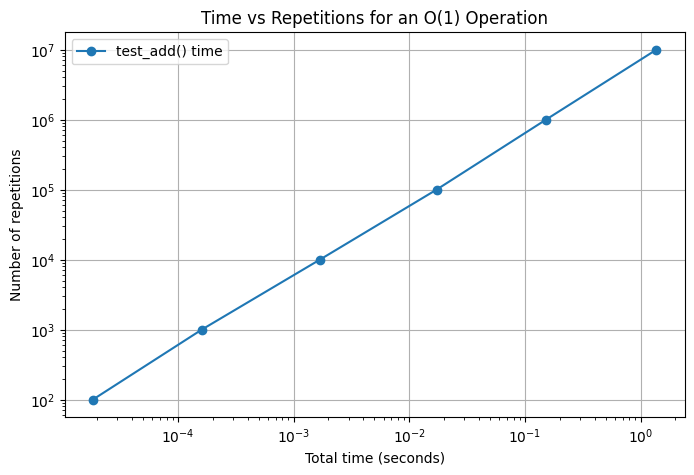

In [4]:
plt.figure(figsize=(8, 5))
plt.plot( times,repeat_counts, marker='o', label='test_add() time')
plt.ylabel("Number of repetitions")
plt.xlabel("Total time (seconds)")
plt.title("Time vs Repetitions for an O(1) Operation")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
from time import perf_counter
import matplotlib.pyplot as plt

def test_add():
    a = 10
    b = 20
    return a + b

def time_test(func, number):
    start = time.perf_counter()
    for _ in range(number):
        func()
    end = time.perf_counter()
    return (end - start) / number   # <-- average time per operation

repeat_counts = [10**i for i in range(2, 4)]
times_per_op = []

for count in repeat_counts:
    avg_time = time_test(test_add, count)
    times_per_op.append(avg_time)
print(times_per_op)



[1.7099984688684345e-07, 1.469999842811376e-07]


In [10]:
nums = [1,2,3,4]
first = nums[0]
last = nums[-1]

In [11]:
import time
import matplotlib.pyplot as plt

def test_access(lst, index):
    # Access the element at the given index (first or last)
    return lst[index]

def test_insert(lst,n):
    return lst.append(n)

def test_pop(lst):
    return lst.pop()

def measure_time(func, lst, index):
    start = time.perf_counter()
    func(lst,index)
    end = time.perf_counter()
    return (end - start)   # Average time per access

def measure_time_append(func, lst, n):
    start = time.perf_counter()
    func(lst,n)
    end = time.perf_counter()
    return (end - start)   # Average time per access

def measure_time_pop(func, lst):
    start = time.perf_counter()
    func(lst)
    end = time.perf_counter()
    return (end - start)   # Average time per access

# Test with lists of different sizes
sizes = [10**i for i in range(1, 7)]  # [10, 100, ..., 1_000_000]
first_access_times = []
last_access_times = []
append_time = []
pop_time =[]

for size in sizes:
    lst = list(range(size))  # Create a list of size 'size'
    # Measure first element access
    t_first = measure_time(test_access, lst, 0)
    first_access_times.append(t_first)
    # Measure last element access
    t_last = measure_time(test_access, lst, -1)
    last_access_times.append(t_last)
    #Measure append
    t_append = measure_time_append(test_insert,lst,4)
    append_time.append(t_append)
    #measure pop
    t_pop = measure_time_pop(test_pop,lst)
    pop_time.append(t_pop)
print(first_access_times)
print(last_access_times)
print(append_time)
print(pop_time)

[1.9999861251562834e-06, 5.00003807246685e-07, 7.00005330145359e-07, 9.00006853044033e-07, 1.400010660290718e-06, 2.5999906938523054e-06]
[8.00006091594696e-07, 5.00003807246685e-07, 4.999747034162283e-07, 6.00004568696022e-07, 9.00006853044033e-07, 1.700012944638729e-06]
[1.3999815564602613e-06, 1.800013706088066e-06, 3.2999960239976645e-06, 1.8999853637069464e-06, 0.0005646999925374985, 0.005719399981899187]
[1.7999846022576094e-06, 8.999777492135763e-07, 6.00004568696022e-07, 5.00003807246685e-07, 1.00000761449337e-06, 1.5999830793589354e-06]


In [12]:
hashmap ={}
hashmap['hey']= 10

In [13]:
print('hey' in hashmap)

True


In [7]:
def loop(n):
    add=0
    for i in range(n):
        add +=n
    return add

def test_loop(func,n):
    start = time.perf_counter()
    func(n)
    end = time.perf_counter()
    return (end - start)
time_loop = []
sizes = [1,10,100,1_000,10_000, 100_000]
for size in sizes:
    time_loop.append(test_loop(loop,size))
print(time_loop)

[6.1998143792152405e-06, 4.500150680541992e-06, 1.5200115740299225e-05, 0.0001680001150816679, 0.0010583000257611275, 0.013786700088530779]


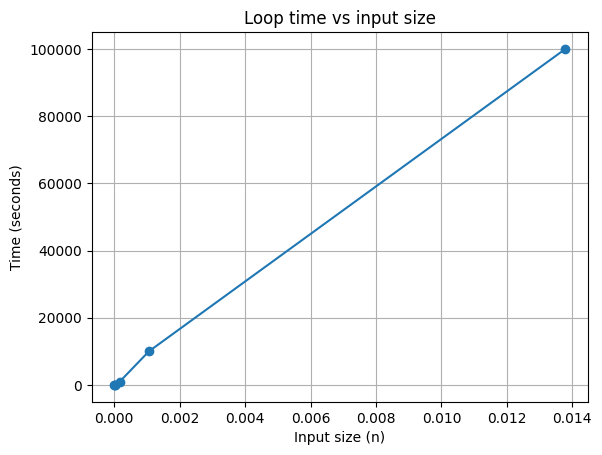

In [8]:
import matplotlib.pyplot as plt
plt.plot(time_loop, sizes,  marker='o')
plt.xlabel('Input size (n)')
plt.ylabel('Time (seconds)')
plt.title('Loop time vs input size')
plt.grid(True)
plt.show()


In [50]:
import heapq
import random 
def test_heapify(n):
    l = [random.randint(1,1000) for i in range(1,n)]
    start_time = time.perf_counter()
    heapq.heapify(l)
    end_time = time.perf_counter()
    return end_time-start_time

time_heap = []
sizes = [1,10,100,1_000,10_000]
for size in sizes:
    time_heap.append(test_loop(loop,size))
print(time_heap)


[4.7000066842883825e-06, 1.100008375942707e-06, 5.699985194951296e-06, 8.229998638853431e-05, 0.0008211999956984073]


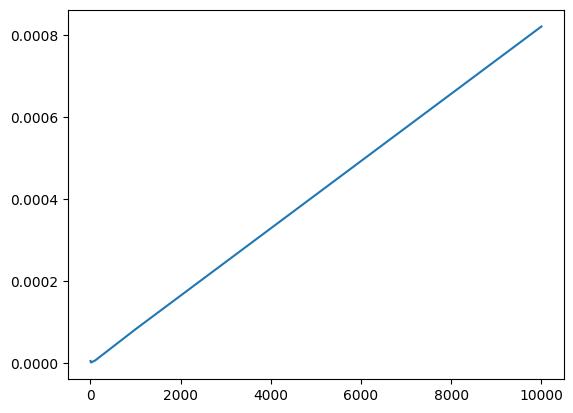

In [51]:
plt.plot(sizes, time_heap)

In [ ]:
# s = 0 #1
# for i in range(n): #n+1
#     for j in range(n): #n(n+1)
#         s = s + 1 #n^2
# print(s)#1

#2n^2 + 2n + 3